## 1. Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score

import xgboost as xgb
import lightgbm as lgb

## 2. Pre-Processing
### 2.1 Reading Data

In [2]:
train_df = pd.read_csv('/Users/allenzhang/Desktop/Career/dataset/shanshu/case2_training.csv')

In [3]:
train_df.head()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept
0,1,4,32,5,1,1,4.526975,0.739994,230.552998,0
1,2,2,87,4,1,1,4.548455,0.862642,348.203425,0
2,3,5,277,5,1,2,4.965732,0.515548,430.462327,0
3,4,3,246,2,1,1,4.752735,0.561547,149.305433,1
4,5,1,155,2,1,2,3.890960,0.817142,165.264184,1


In [4]:
y = train_df['Accept']

X = train_df.drop(['Accept'], axis=1)
X = X.drop('ID', axis=1)

features_name = X.columns.values

### 2.2 Pearson Correlation of Features

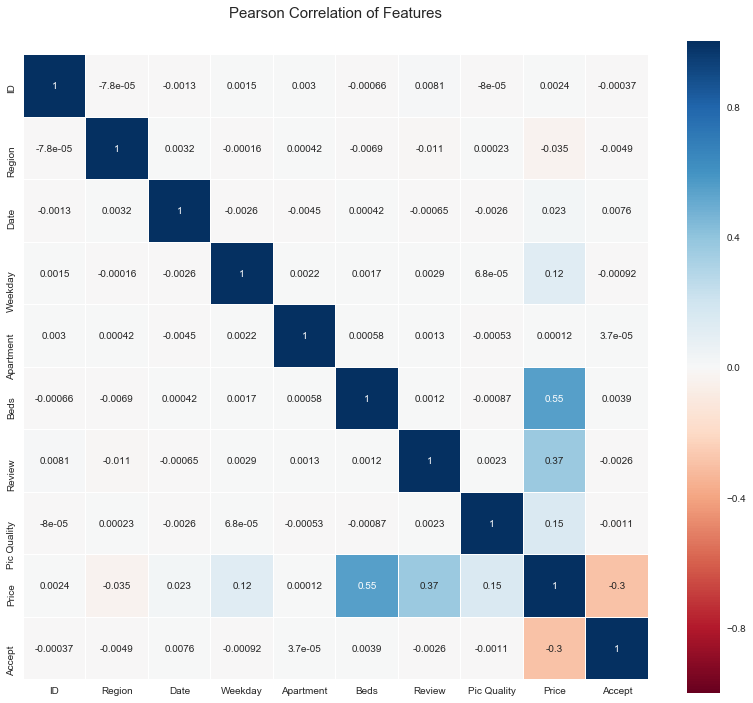

In [5]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);

### 2.3 VISUALISE LABELS AND FREQUENCIES (BAR CHART)

sns.set_style("whitegrid", {'axes.grid' : True})
plt.figure(figsize=(6,6))
sns.set(style='darkgrid')
ax_label = sns.countplot(y = y, palette="RdBu")
ax_label.set(ylabel = 'Label', xlabel = 'Count')

### 2.4 Feature Histogram

#### 2.4.1 Printing Feature Name

In [6]:
features_name

array(['Region', 'Date', 'Weekday', 'Apartment', 'Beds', 'Review',
       'Pic Quality', 'Price'], dtype=object)

#### 2.4.2 Ploting Histogram

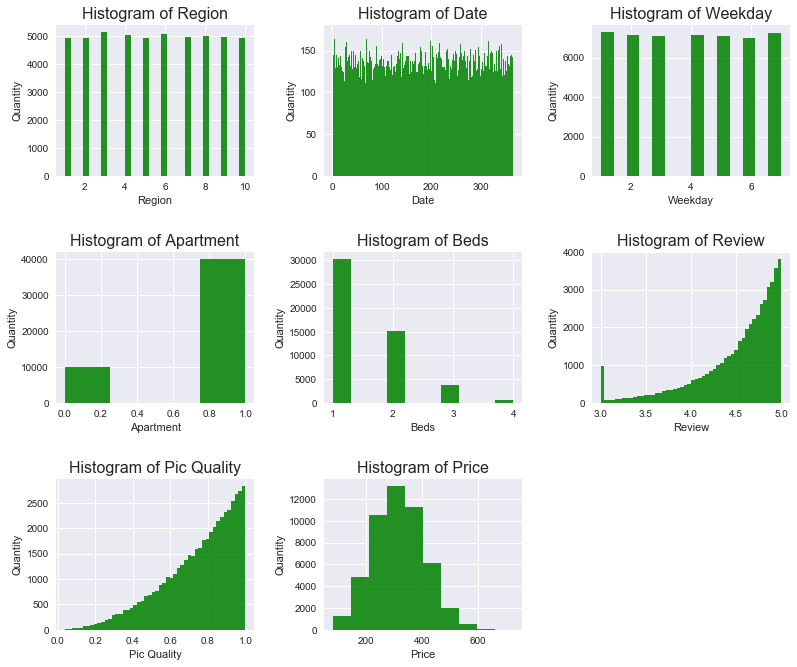

In [7]:
plt.figure(figsize=(12,10))

plt.subplot(331)
plt.hist(X['Region'], 30, facecolor='g', alpha=0.85)
plt.xlabel('Region')
plt.ylabel('Quantity')
plt.title('Histogram of Region', fontsize=16);

plt.subplot(332)
plt.hist(X['Date'], 365, facecolor='g', alpha=0.85)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Histogram of Date', fontsize=16);

plt.subplot(333)
plt.hist(X['Weekday'], 14, facecolor='g', alpha=0.85)
plt.xlabel('Weekday')
plt.ylabel('Quantity')
plt.title('Histogram of Weekday', fontsize=16);

plt.subplot(334)
plt.hist(X['Apartment'], 4, facecolor='g', alpha=0.85)
plt.xlabel('Apartment')
plt.ylabel('Quantity')
plt.title('Histogram of Apartment', fontsize=16);

plt.subplot(335)
plt.hist(X['Beds'], 10, facecolor='g', alpha=0.85)
plt.xlabel('Beds')
plt.ylabel('Quantity')
plt.title('Histogram of Beds', fontsize=16);

plt.subplot(336)
plt.hist(X['Review'], 50, facecolor='g', alpha=0.85)
plt.xlabel('Review')
plt.ylabel('Quantity')
plt.title('Histogram of Review', fontsize=16);

plt.subplot(337)
plt.hist(X['Pic Quality'], 50, facecolor='g', alpha=0.85)
plt.xlabel('Pic Quality')
plt.ylabel('Quantity')
plt.title('Histogram of Pic Quality', fontsize=16);

plt.subplot(338)
plt.hist(X['Price'], facecolor='g', alpha=0.85)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Histogram of Price', fontsize=16);


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)

### 2.5 Normalize Data

In [8]:
# normalized_X=(X-X.mean())/X.std()
X=(X-X.mean())/X.std()

### 2.6 Five-Fold Preparing

In [9]:
kf = KFold(n_splits=5)
X_train, X_vali, y_train, y_vali = train_test_split(X,y, test_size=0.2)

## 3. Random Forest Model

### 3.1 Five-Fold By RF Model Testing

In [10]:
%%time

acc_list = []
imp_list = []

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# 5-fold data to calculate accuracy and feature importances
for train_index, vali_index in kf.split(X):
    X_train, X_vali = X.iloc[train_index], X.iloc[vali_index]
    y_train, y_vali = y[train_index], y[vali_index]
    random_forest.fit(X_train, y_train)
    acc_list.append(random_forest.score(X_vali, y_vali))
    
    # Extract feature importances
    imp_list.append(random_forest.feature_importances_)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jo

CPU times: user 45.6 s, sys: 956 ms, total: 46.6 s
Wall time: 17.7 s


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


### 3.2 The RF Model Performance

In [11]:
acc_rf = np.mean(acc_list)
imp_mean = np.mean(imp_list, axis = 0)
feature_importances = pd.DataFrame({'feature': features_name, 'importance': imp_mean})

print("The random forest 5-fold average accuracy is %3f" % acc_rf)

print("--------------------\nthe average 5-fold feature importances in random forest as follow: ")
print(feature_importances)

The random forest 5-fold average accuracy is 0.728340
--------------------
the average 5-fold feature importances in random forest as follow: 
       feature  importance
0       Region    0.077428
1         Date    0.150060
2      Weekday    0.057099
3    Apartment    0.015787
4         Beds    0.037759
5       Review    0.188062
6  Pic Quality    0.177312
7        Price    0.296493


### 3.3 Last fold ROC curve and AUC score

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


AUC is 0.764002


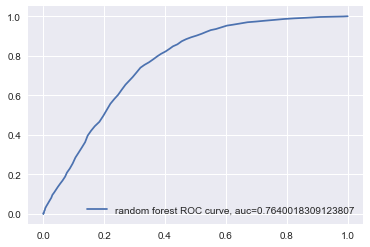

In [12]:
y_pred = random_forest.predict_proba(X_vali)

fpr, tpr, _ = roc_curve(y_vali,  y_pred[:,1])
auc = roc_auc_score(y_vali,  y_pred[:,1])

print("AUC is %4f" % auc)

plt.plot(fpr,tpr,label="random forest ROC curve, auc="+str(auc))
plt.legend(loc=4);

## 4. Others Model Trying

### 4.1 Logistic Regression Model

In [13]:
%%time
lr_clf = LogisticRegression(penalty='l2', max_iter=500, verbose=1)

lr_clf.fit(X_train, y_train)
print(lr_clf.score(X_vali, y_vali))
print("------------------------\ntime data as follow:")

[LibLinear]0.7453
------------------------
time data as follow:
CPU times: user 75.2 ms, sys: 10.4 ms, total: 85.7 ms
Wall time: 96.7 ms


LR AUC is 0.769891


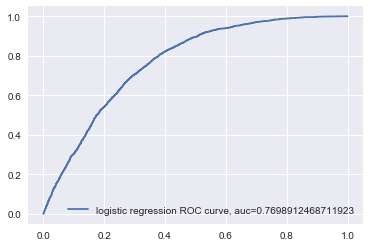

In [14]:
lr_pred_prob = lr_clf.predict_proba(X_vali)
lr_fpr, lr_tpr, _ = roc_curve(y_vali,  lr_pred_prob[:,1])
lr_auc = roc_auc_score(y_vali,  lr_pred_prob[:,1])

print("LR AUC is %4f" % lr_auc)

plt.plot(lr_fpr, lr_tpr, label="logistic regression ROC curve, auc="+str(lr_auc))
plt.legend(loc=4);

### 4.2 SVM

In [15]:
%%time
SVM_clf = SVC(verbose=1)

SVM_clf.fit(X_train, y_train)
print(SVM_clf.score(X_vali, y_vali))
print("------------------------\ntime data as follow:")

[LibSVM]0.7428
------------------------
time data as follow:
CPU times: user 37.1 s, sys: 391 ms, total: 37.5 s
Wall time: 37.9 s


### 4.3 XgBoosing Model

In [16]:
%%time
gbm = xgb.XGBClassifier(
        learning_rate = 0.02,
        n_estimators= 2000,
        max_depth= 4,
        min_child_weight= 2,
        #gamma=1,
        gamma=0.9,                        
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread= -1,
        scale_pos_weight=1).fit(X_train, y_train)
xgb_pred = gbm.predict(X_vali)
xgb_acc = np.sum(xgb_pred == list(y_vali)) / len(y_vali)
print("XgBoost accuracy is %3f" % xgb_acc)
print("------------------------\ntime data as follow:")

XgBoost accuracy is 0.743500
------------------------
time data as follow:
CPU times: user 38.6 s, sys: 331 ms, total: 38.9 s
Wall time: 39.6 s


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 4.4 Gradient Boosting Machine: LGB Model

In [17]:
%%time
lgb_model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_vali)
lgb_acc = np.sum(lgb_pred == list(y_vali)) / len(y_vali)
print("XgBoost accuracy is %3f" % xgb_acc)
print("------------------------\ntime data as follow:")

XgBoost accuracy is 0.743500
------------------------
time data as follow:
CPU times: user 1min 32s, sys: 52.5 s, total: 2min 25s
Wall time: 1min 13s


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LGB AUC is 0.743107


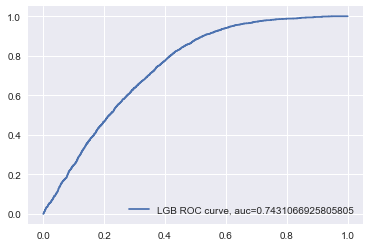

In [18]:
lgb_pred_prob = lgb_model.predict_proba(X_vali)

lgb_fpr, lgb_tpr, _ = roc_curve(y_vali,  lgb_pred_prob[:,1])
lgb_auc = roc_auc_score(y_vali,  lgb_pred_prob[:,1])

print("LGB AUC is %4f" % lgb_auc)

plt.plot(lgb_fpr, lgb_tpr, label="LGB ROC curve, auc="+str(lgb_auc))
plt.legend(loc=4);

## 5. Predict Data

In [19]:
prediction_prob = random_forest.predict_proba(X)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


In [20]:
prediction = random_forest.predict(X)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


In [21]:
prob = prediction_prob[:,1]
print("length of prob is %d" %len(prob))

length of prob is 50000


In [22]:
res = np.concatenate((np.array(list(range(len(prob)))).reshape(50000,1), prob.reshape(50000,1)), axis = 1)

In [23]:
pd.DataFrame(res, columns=['ID', 'Probability']).to_csv("result.csv", header=True, index=False, sep=',')